<a href="https://colab.research.google.com/github/Abdula1111Zizaev/Vorhersagende-Maschine-/blob/main/Toxic_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
nltk.download("stopwords")
nltk.download('punkt_tab')
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt

import numpy as np
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("/content/sample_data/youtoxic_english_1000.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
df

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df = df.drop(columns=['CommentId', 'VideoId'], errors='ignore')

In [30]:
df.loc[:, df.columns != 'Text'] = df.loc[:, df.columns != 'Text'].astype(int)

<ipython-input-30-077193f856bb>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0

In [31]:
df["IsThreat"].value_counts()

,count
IsThreat,
0,979
1,21


In [32]:
df_TT = df.iloc[:, :2]
df_TT

,Text,IsToxic
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,1
2,\nDont you reckon them 'black lives matter' ba...,1
3,There are a very large number of people who do...,0
4,"The Arab dude is absolutely right, he should h...",0
...,...,...
995,I remember that they sent in the national defe...,0
996,Stats don`t represent the problem. Race baitin...,1
997,The quote from the mother... Wow that hit hard...,0
998,this video is so racist,0


In [33]:
X_train, X_test = train_test_split(df_TT, test_size=100)

In [34]:
X_train['Text']

,Text
208,While i dont agree with police action to kill ...
719,Who the hell cares if there are people peacef...
892,"Muslims from the UK, are with our black brothe..."
438,This is yet another reason why police need to ...
841,"""You can't stop the revolution!"" Well, it's be..."
...,...
776,We need more people like Peggy Hubbard! I supp...
341,At no time was it reported that Mr. Brown appr...
530,Man this guy has nothing but a bunch of waffli...
321,I don't care about Mike brown or any other bul...


In [35]:
sentence_example = df.iloc[1]["Text"]
tokens = word_tokenize(sentence_example, language="english")
tokens_without_punctuation = [i.lower() for i in tokens if i not in string.punctuation]
english_stop_words = stopwords.words("english")
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in english_stop_words]
snowball = SnowballStemmer(language="english")
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]


In [36]:
stemmed_tokens


['law',
 'enforc',
 'train',
 'shoot',
 'apprehend',
 'train',
 'shoot',
 'kill',
 'thank',
 'wilson',
 'kill',
 'punk',
 'bitch']

In [37]:
snowball = SnowballStemmer(language="english")
english_stop_words = stopwords.words("english")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="english")
    tokens = [i.lower() for i in tokens if i not in string. punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in english_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [38]:
tokenize_sentence(sentence_example)

['law',
 'enforc',
 'train',
 'shoot',
 'apprehend',
 'train',
 'shoot',
 'kill',
 'thank',
 'wilson',
 'kill',
 'punk',
 'bitch']

In [39]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True), token_pattern=None)

In [40]:
features = vectorizer. fit_transform(X_train['Text'] )

In [41]:
model = LogisticRegression(random_state=0)
model. fit(features, X_train['IsToxic'])


LogisticRegression(random_state=0)

In [42]:
model.predict(features [1])

array([1])

In [43]:
X_train.iloc[1]

,719
Text,Who the hell cares if there are people peacef...
IsToxic,1


In [44]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
])

In [45]:
model_pipeline.fit(X_train["Text"], X_train["IsToxic"])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7beee00a6520>)),
                ('model', LogisticRegression(random_state=0))])

In [46]:
model_pipeline.predict(["i love u, bitch"])

array([1])

In [47]:
precision_score(y_true=X_test["IsToxic"], y_pred=model_pipeline.predict(X_test["Text"]) )

0.8157894736842105

In [48]:
recall_score(y_true=X_test["IsToxic"], y_pred=model_pipeline.predict(X_test["Text"]))

0.6078431372549019

In [49]:
thresholds = precision_recall_curve(y_true=X_test["IsToxic"],probas_pred=model_pipeline.predict_proba(X_test["Text"])[:, 1] )

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:996: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:996: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


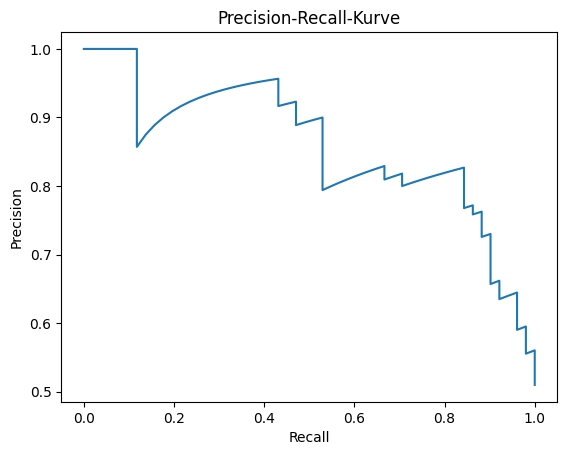

In [50]:
precision, recall, thresholds = precision_recall_curve(y_true=X_test["IsToxic"], probas_pred=model_pipeline.predict_proba(X_test["Text"])[:, 1])

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall-Kurve")
plt.show()

In [51]:
np.where(precision > 0.9)

(array([ 74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
         87,  88,  89,  94,  95,  96,  97,  98,  99, 100]),)

In [52]:
precision_score(y_true=X_test["IsToxic"], y_pred=model_pipeline.predict_proba(X_test["Text"]) [:, 1] > thresholds[96])

1.0

In [53]:
recall_score(y_true=X_test["IsToxic"], y_pred=model_pipeline.predict_proba(X_test["Text"]) [:, 1] > thresholds[96] )

0.058823529411764705

In [54]:
grid_pipeline = Pipeline( [
  ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
  ("model",
    GridSearchCV(
      LogisticRegression(random_state=0),
      param_grid={'C': [0.1, 1, 10.]},
      cv=3,
        verbose=4
    )

  )

])

grid_pipeline.fit(X_train["Text"], X_train["IsToxic"] )

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.573 total time=   0.0s
[CV 2/3] END .............................C=0.1;, score=0.563 total time=   0.0s
[CV 3/3] END .............................C=0.1;, score=0.567 total time=   0.0s
[CV 1/3] END ...............................C=1;, score=0.717 total time=   0.0s
[CV 2/3] END ...............................C=1;, score=0.703 total time=   0.0s
[CV 3/3] END ...............................C=1;, score=0.650 total time=   0.0s
[CV 1/3] END ............................C=10.0;, score=0.700 total time=   0.0s
[CV 2/3] END ............................C=10.0;, score=0.683 total time=   0.0s
[CV 3/3] END ............................C=10.0;, score=0.697 total time=   0.0s


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7beed9f22ca0>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [55]:
model_pipeline_c_10 = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0, C=10))
])

In [56]:
model_pipeline_c_10.fit(X_train["Text"], X_train["IsToxic"] )

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7beee00b4860>)),
                ('model', LogisticRegression(C=10, random_state=0))])

In [57]:
y_pred = model_pipeline_c_10.predict(X_test["Text"])

In [58]:
precision = precision_score(y_true=X_test["IsToxic"], y_pred=y_pred)
recall = recall_score(y_true=X_test["IsToxic"], y_pred=y_pred)

In [59]:
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7872340425531915
Recall: 0.7254901960784313


In [60]:
model_pipeline_c_10.predict([" u cant kill someone; if u kill someone u are killer "])

array([0])

In [61]:
y_pred = grid_pipeline.predict(X_test["Text"])
precision = precision_score(y_true=X_test["IsToxic"], y_pred=y_pred)
recall = recall_score(y_true=X_test["IsToxic"], y_pred=y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7872340425531915
Recall: 0.7254901960784313


In [62]:
def predict_toxicity(text):
  prediction = model_pipeline_c_10.predict([text])[0]
  if prediction == 1:
    return "is toxic"
  else:
    return "is good"

In [63]:
print(predict_toxicity("if u kill someone it means u are a bad gay"))

is good
